# Lasso Regression

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [96]:
data = pd.read_csv("Social_Network_Ads (1).csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Checking the dimensions

In [97]:
print(data.shape)

(400, 5)


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [78]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [79]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [80]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [81]:
data['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

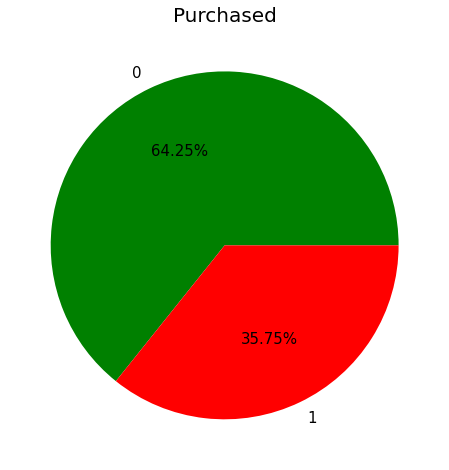

In [82]:
mycolors = ['g','r']
plt.figure(figsize = (12,8))
plt.pie(data['Purchased'].value_counts(), labels = ['0', '1'], colors=mycolors,autopct = '%.2f%%', 
        labeldistance=1.1, textprops = {'fontsize': 15})
plt.title('Purchased', fontsize=20)
plt.show()

<AxesSubplot:>

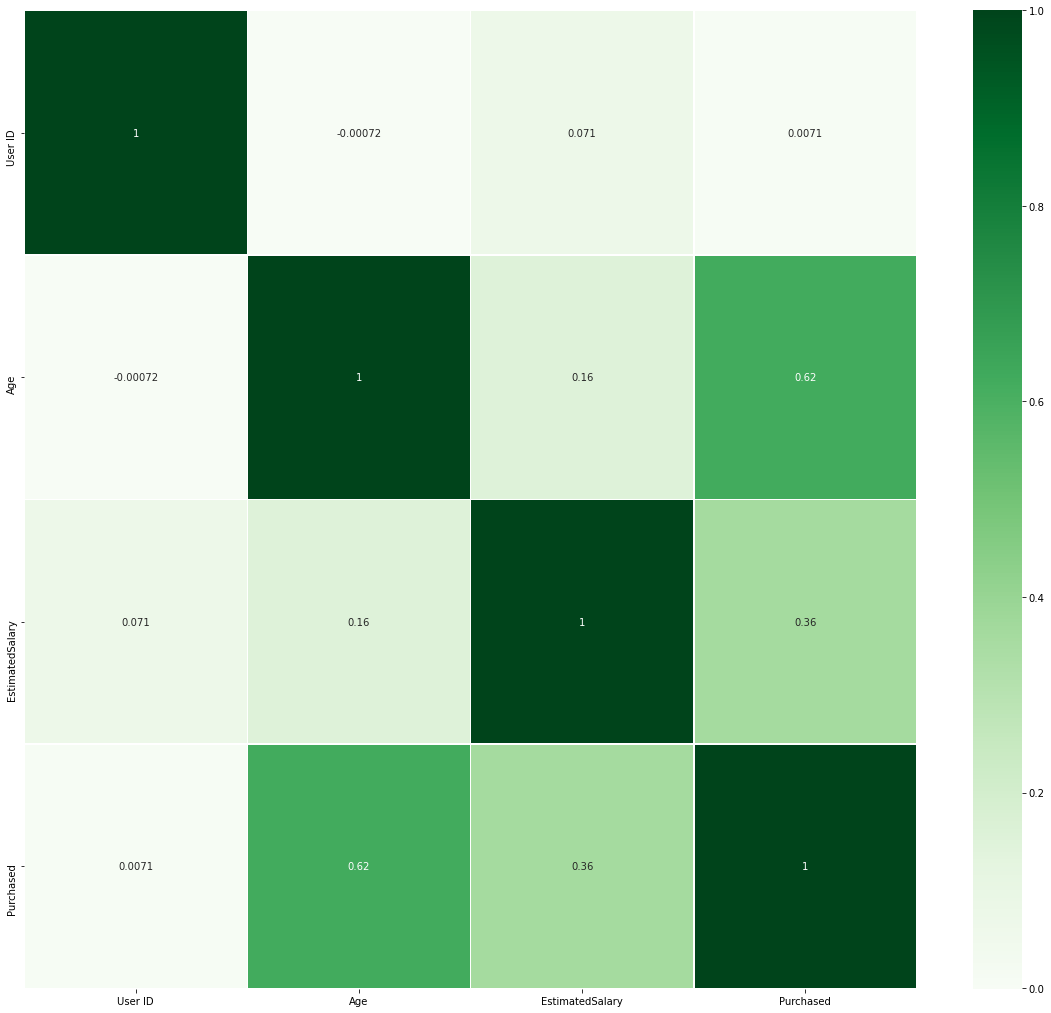

In [83]:
#Visualization of data 
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(), annot=True,linewidths=.5, cmap="Greens")

In [84]:
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [85]:
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [86]:
# Since most of the column types are object, we are not able to get the statistics of the dataframe.
# Convert them to numeric type

#Catgorical data  
#for Country Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])  

In [87]:
#encoding for purchased variable  
labelencoder_y= LabelEncoder()  
y= labelencoder_y.fit_transform(y)  

In [88]:
# splitting the dataset into  training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(280, 2)
(280,)
(120, 2)
(120,)


In [93]:
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(x_train,y_train)

#Predicting for X_test
y_pred_lass =lasso_reg.predict(x_test)



In [94]:
lasso.score(x_test, y_test), lasso.score(x_train, y_train)

(0.3458265637775251, 0.41589805770035804)

In [95]:
lasso.coef_

array([0.01591611, 0.00390445])